## Step 1: Import Libraries

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score



## Step 2: Load the Dataset

In [128]:
data = pd.read_csv('Credit_Card.csv')

In [129]:
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Application Status
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,Selected
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,Selected
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,Selected
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,Selected
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,Selected


## Step 3: Data Exploring and Visulisation


In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ind_ID              1548 non-null   int64  
 1   GENDER              1541 non-null   object 
 2   Car_Owner           1548 non-null   object 
 3   Propert_Owner       1548 non-null   object 
 4   CHILDREN            1548 non-null   int64  
 5   Annual_income       1525 non-null   float64
 6   Type_Income         1548 non-null   object 
 7   EDUCATION           1548 non-null   object 
 8   Marital_status      1548 non-null   object 
 9   Housing_type        1548 non-null   object 
 10  Birthday_count      1526 non-null   float64
 11  Employed_days       1548 non-null   int64  
 12  Mobile_phone        1548 non-null   int64  
 13  Work_Phone          1548 non-null   int64  
 14  Phone               1548 non-null   int64  
 15  EMAIL_ID            1548 non-null   int64  
 16  Type_O

In [131]:
data.shape

(1548, 19)

<Axes: xlabel='Application Status', ylabel='count'>

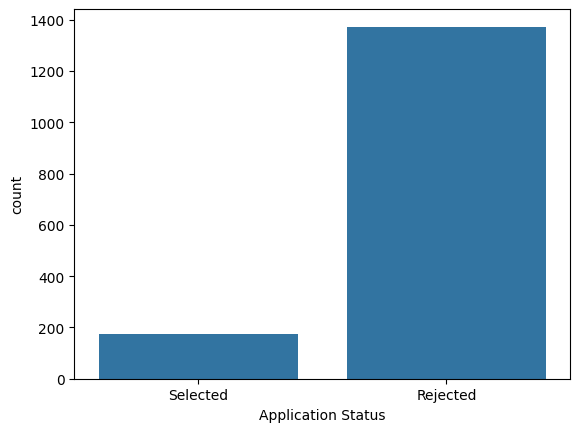

In [132]:
sns.countplot(x = "Application Status", data = data)

In [133]:
# checking for the null values.
data.isnull().sum()

Ind_ID                  0
GENDER                  7
Car_Owner               0
Propert_Owner           0
CHILDREN                0
Annual_income          23
Type_Income             0
EDUCATION               0
Marital_status          0
Housing_type            0
Birthday_count         22
Employed_days           0
Mobile_phone            0
Work_Phone              0
Phone                   0
EMAIL_ID                0
Type_Occupation       488
Family_Members          0
Application Status      0
dtype: int64

<Axes: >

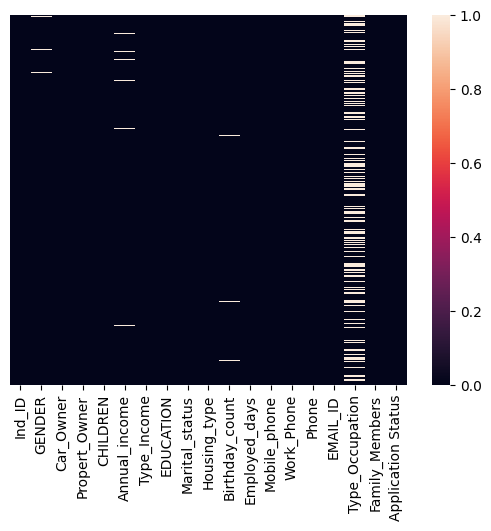

In [134]:
sns.heatmap(data.isnull(), yticklabels=False)

In [135]:
# Checking the weightage of null values.

print("For Gender:",(data['GENDER'].isnull().sum()/data.shape[0]*100).round(2))
print("For Annual income:",(data['Annual_income'].isnull().sum()/data.shape[0]*100).round(2))
print("For Birthday count:",(data['Birthday_count'].isnull().sum()/data.shape[0]*100).round(2))
print("For Occupation Type:",(data['Type_Occupation'].isnull().sum()/data.shape[0]*100).round(2))

For Gender: 0.45
For Annual income: 1.49
For Birthday count: 1.42
For Occupation Type: 31.52


In [136]:
#From the above its clear that more than 30% of the data does not have Occupation type updated. 
# And we also understand that there are no other features that will help us find out the same. 
# Thus we will drop this feature
data.drop("Type_Occupation",axis=1,inplace=True)


In [137]:
# Now we will drop all row having null values
data = data.dropna(axis=0)

In [138]:
# checking for the null values again.
data.isnull().sum()



Ind_ID                0
GENDER                0
Car_Owner             0
Propert_Owner         0
CHILDREN              0
Annual_income         0
Type_Income           0
EDUCATION             0
Marital_status        0
Housing_type          0
Birthday_count        0
Employed_days         0
Mobile_phone          0
Work_Phone            0
Phone                 0
EMAIL_ID              0
Family_Members        0
Application Status    0
dtype: int64

In [139]:
data = data.drop('Ind_ID', axis=1) #remove unwanted columns

In [140]:
data.head(10)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,Application Status
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,2,Selected
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,Selected
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,Selected
6,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,Selected
7,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22134.0,365243,1,0,0,0,2,Selected
8,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,3,Selected
9,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,3,Selected
10,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-18173.0,-678,1,0,1,1,1,Selected
11,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-18950.0,-1002,1,1,1,0,2,Selected
13,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-18950.0,-1002,1,1,1,0,2,Selected


## Step :4 Label Encode Categorical Columns

Since some of the features and the target variable are categorical (e.g., "Male" or "Female"), we use **LabelEncoder** to convert these string values into numerical form:
- "Male" becomes 1 and "Female" becomes 0 (for the target variable).
- Similarly, categorical feature columns are also encoded.

Label encoding ensures the model can process these values as numerical data.


label = LabelEncoder()

In [141]:
label = LabelEncoder()

In [142]:
data[['GENDER','Car_Owner','Propert_Owner','Type_Income','EDUCATION','Marital_status','Housing_type','Application Status']] = data[['GENDER','Car_Owner','Propert_Owner','Type_Income','EDUCATION','Marital_status','Housing_type','Application Status']].apply(label.fit_transform)

In [143]:
data.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,Application Status
0,1,1,1,0,180000.0,1,1,1,1,-18772.0,365243,1,0,0,0,2,1
1,0,1,0,0,315000.0,0,1,1,1,-13557.0,-586,1,1,1,0,2,1
4,0,1,0,0,315000.0,0,1,1,1,-13557.0,-586,1,1,1,0,2,1
6,0,1,0,0,315000.0,0,1,1,1,-13557.0,-586,1,1,1,0,2,1
7,0,0,0,0,180000.0,1,4,1,1,-22134.0,365243,1,0,0,0,2,1


## Step 5: Preprocess the Dataset


In [144]:
x = data.iloc[:,0:-1]

In [145]:
x.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members
0,1,1,1,0,180000.0,1,1,1,1,-18772.0,365243,1,0,0,0,2
1,0,1,0,0,315000.0,0,1,1,1,-13557.0,-586,1,1,1,0,2
4,0,1,0,0,315000.0,0,1,1,1,-13557.0,-586,1,1,1,0,2
6,0,1,0,0,315000.0,0,1,1,1,-13557.0,-586,1,1,1,0,2
7,0,0,0,0,180000.0,1,4,1,1,-22134.0,365243,1,0,0,0,2


In [146]:
y = data.iloc[:,-1]

In [147]:
y

0       1
1       1
4       1
6       1
7       1
       ..
1542    0
1544    0
1545    0
1546    0
1547    0
Name: Application Status, Length: 1496, dtype: int32

In [148]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=9)

In [149]:
x_train.shape

(1196, 16)

In [150]:
y_train.shape

(1196,)

## Step 6: Train the Model


In [151]:
model = LogisticRegression()

In [152]:
model.fit(x_train,y_train)

C:\Users\window10\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Step 7: Evaluate the Model


In [153]:
y_pred = model.predict(x_test) #Predicted values

In [154]:
df = pd.DataFrame({
    'Actual Value' : y_test,
    'Predicted Value' : y_pred }
)

In [155]:
df.head(15) #Actual Vs Predicted Values

,Actual Value,Predicted Value
821,0,0
326,0,0
322,0,0
1291,0,0
1147,0,0
1123,0,0
1013,0,0
1160,0,0
797,0,0
767,0,0


In [156]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9066666666666666

Confusion Matrix:
 [[272   0]
 [ 28   0]]


## Step 8: Visualize Results


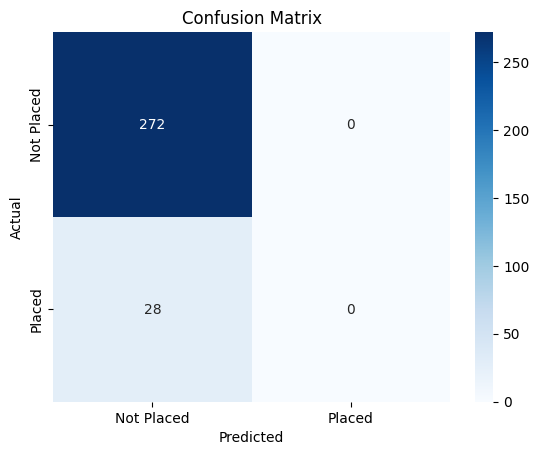

In [157]:
# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Placed', 'Placed'], yticklabels=['Not Placed', 'Placed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Step 9: Save the Model


In [158]:
# Save the model using Joblib
import joblib
joblib.dump(model, 'binary_classification.joblib')


['binary_classification.joblib']

## Conclusion

After training and evaluating the Logistic Regression model, the accuracy score achieved on the test set is **0.90**. This means that the model correctly predicted the target variable **90%** of the time.

Overall, the model has provided a reasonable prediction of whether the application for credit card will be "Selected" or "Rejected" based on the given features, and it can be deployed for practical use.
